# Simple Linear Regression Practice

In [1]:
import numpy as np
import torch
import torch.nn as nn
import pandas as pd

We want to compute the slope and bias in simple regression manually and compare with sklearn built-in function.

We start with importing **auto-mpg** dataset from UCI and assume the input is *Horsepower* while the output is *MPG*. Common sense tells us that MPG may decrease when Horsepower increase which indicates the slope (or weight) is likely negative.

In [2]:
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data'
column_names = ['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight',
                'Acceleration', 'Model Year', 'Origin']

df = pd.read_csv(url, names=column_names,
                 na_values = "?", comment='\t',
                 sep=" ", skipinitialspace=True)

df.tail()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
393,27.0,4,140.0,86.0,2790.0,15.6,82,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,2
395,32.0,4,135.0,84.0,2295.0,11.6,82,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,1
397,31.0,4,119.0,82.0,2720.0,19.4,82,1


In [3]:
df

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1
...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790.0,15.6,82,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,2
395,32.0,4,135.0,84.0,2295.0,11.6,82,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,1


In practice, we may found there are missing elements in dataset, where we can deal with various options. For sake of simplicity, let's just drop those samples with NaN or missing value.

In [4]:
print(df.isna().sum())

df = df.dropna()
df = df.reset_index(drop=True)

MPG             0
Cylinders       0
Displacement    0
Horsepower      6
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64


In [5]:
print(df.isna().sum())

MPG             0
Cylinders       0
Displacement    0
Horsepower      0
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64


We take the Horsepower as input, set to X, while MPG as y, please finish the lines with ##TODO by referring to [sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html), you need be careful with dimension of input and output, they are tricky.

In [6]:
X=df['Horsepower'].to_numpy().reshape(-1,1)## TODO

In [7]:
y=df['MPG'].to_numpy()## TODO

Now we call fit function where every information can be traced for the regression model.

In [8]:
import numpy as np
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X, y)

Please check the slope:

In [9]:
##TODO
reg.coef_

array([-0.15784473])

Please check the bias:

In [10]:
##TODO
reg.intercept_

np.float64(39.93586102117047)

Now we turn to manually verify its correctness by using the closed solution we derive in class where $w=\frac{\sum_i(x_i-\bar{x})(y_i-\bar{y})}{\sum_i(x_i-\bar{x})^2}$ where $\bar{x}, \bar{y}$ denotes the mean of $x$ and $y$, respectively, while $b=\bar{y}-w*\bar{x}$.

In [12]:
X_1d = X.ravel()

In [13]:
w = np.dot(X_1d-X_1d.mean(),y-y.mean())/np.dot(X_1d-X_1d.mean(),X_1d-X_1d.mean())##TODO

In [14]:
w

np.float64(-0.15784473335365368)

In [15]:
b = y.mean()-w*X_1d.mean()##TODO

In [16]:
b

np.float64(39.935861021170474)

Now we plot the fitting line in addition to the data samples, obviously the fitting is acceptable and slop is negative which validates our intuition.

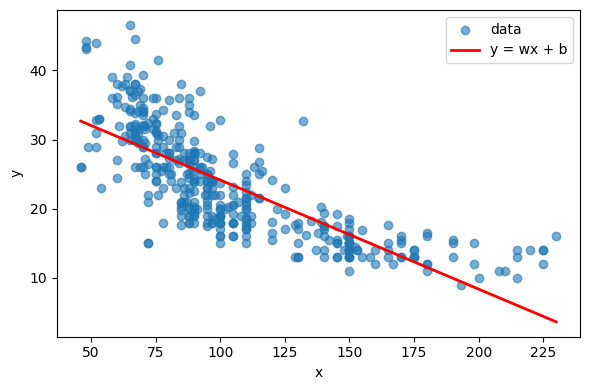

In [17]:
import matplotlib.pyplot as plt

idx = np.argsort(X_1d)
x_sorted = X_1d[idx]
y_sorted = y[idx]

y_hat = w * x_sorted + b

plt.figure(figsize=(6, 4))
plt.scatter(X_1d, y, alpha=0.6, label="data")
plt.plot(x_sorted, y_hat, color="red", linewidth=2, label="y = wx + b")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.tight_layout()
plt.show()

Now we turn to manually calculate fitting score $R^2$,  defined as $1-\frac{u}{v}$, where $u$
 is the residual sum of squares ((y_true - y_pred)** 2).sum() and $v$
 is the total sum of squares ((y_true - y_true.mean()) ** 2).sum()

In [18]:
##TODO: R2=
u=((y_sorted-y_hat)**2).sum()
v=((y-y.mean())**2).sum()
1-u/v

np.float64(0.6059482578894348)

Congratulations on your finish! Hope you enjoy it!

In [19]:
reg.score(X,y)

0.6059482578894348